# Rental Price Prediction using Linear Regression Method
This file is dedicated to predicting Rental prices of housing in Singapore.
This file would be using the Linear Regression Method to predicting the rental prices.

## Data Collection
- The following codes below in this section is dedicated to reading and combining csv files into 1 dataframe.
- We also import all necessary modules in this section as well.


In [74]:
# Necessary Imports
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pandas import DataFrame

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import *
# Will add more imports here later

In [75]:
file_path = "../dataset/rental-prediction/Non-Landed Housing/"
file_path2 = "../dataset/rental-prediction/Landed Properties/"
file_path3 = "../dataset/rental-prediction/Executive Condominiums/"

#combining all into one file for non-landed
df1 = pd.read_csv(file_path+"1-5.csv")
df2 = pd.read_csv(file_path+"6-10.csv")
df3 = pd.read_csv(file_path+"11-15.csv")
df4 = pd.read_csv(file_path+"16-20.csv")
df5 = pd.read_csv(file_path+"21-23,25-26.csv")
df6 = pd.read_csv(file_path+"27-28.csv")
df_nonLanded = pd.concat([df1,df2,df3,df4,df5,df6], axis=0, join='inner')

#combining all into one file for landed
df1 = pd.read_csv(file_path2+"1-5.csv")
df2 = pd.read_csv(file_path2+"6-10.csv")
df3 = pd.read_csv(file_path2+"11-15.csv")
df4 = pd.read_csv(file_path2+"16-20.csv")
df5 = pd.read_csv(file_path2+"21-23,25-26.csv")
df6 = pd.read_csv(file_path2+"27-28.csv")
df_Landed = pd.concat([df1,df2,df3,df4,df5,df6], axis=0, join='inner')

#combining all into one file for Executive Condominium
df1 = pd.read_csv(file_path3+"16-20.csv")
df2 = pd.read_csv(file_path3+"21-23,25-26.csv")
df3 = pd.read_csv(file_path3+"27-28.csv")
df_EC = pd.concat([df1,df2,df3], axis=0, join='inner')

df = pd.concat([df_nonLanded,df_Landed,df_EC], axis=0, join='inner')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447228 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   S/N                                  447228 non-null  int64 
 1   Building/Project Name                447228 non-null  object
 2   Street Name                          447228 non-null  object
 3   Postal District                      447228 non-null  int64 
 4   Type                                 447228 non-null  object
 5   No. of Bedroom(for Non-Landed Only)  436938 non-null  object
 6   Monthly Gross Rent($)                447228 non-null  int64 
 7   Floor Area (sq ft)                   447228 non-null  object
 8   Lease Commencement Date              447228 non-null  object
dtypes: int64(3), object(6)
memory usage: 34.1+ MB


In [77]:
df = df.replace({'Jan':'1-1'},regex=True)
df = df.replace({'Feb':'1-2'},regex=True)
df = df.replace({'Mar':'1-3'},regex=True)
df = df.replace({'Apr':'1-4'},regex=True)
df = df.replace({'May':'1-5'},regex=True)
df = df.replace({'Jun':'1-6'},regex=True)
df = df.replace({'Jul':'1-7'},regex=True)
df = df.replace({'Aug':'1-8'},regex=True)
df = df.replace({'Sep':'1-9'},regex=True)
df = df.replace({'Oct':'1-10'},regex=True)
df = df.replace({'Nov':'1-11'},regex=True)
df = df.replace({'Dec':'1-12'},regex=True)

df = df.replace({'-':'/'},regex=True)

In [78]:
now = pd.to_datetime("now")

# Convert month column to 'month' type
df['Lease Commencement Date'] = pd.to_datetime(df['Lease Commencement Date'])
df['Lease Commencement Date'] = (now - df['Lease Commencement Date']).dt.days
# Convert month to ordinal type
#df_nonLanded['Lease Commencement Date'] = df_nonLanded['Lease Commencement Date'].map(datetime.datetime.toordinal)


# Check data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447228 entries, 0 to 405
Data columns (total 9 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   S/N                                  447228 non-null  int64 
 1   Building/Project Name                447228 non-null  object
 2   Street Name                          447228 non-null  object
 3   Postal District                      447228 non-null  int64 
 4   Type                                 447228 non-null  object
 5   No. of Bedroom(for Non-Landed Only)  436938 non-null  object
 6   Monthly Gross Rent($)                447228 non-null  int64 
 7   Floor Area (sq ft)                   447228 non-null  object
 8   Lease Commencement Date              447228 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 34.1+ MB


## Cleaning Data

In [79]:
df.head()

,S/N,Building/Project Name,Street Name,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date
0,1,SKYLINE RESIDENCES,TELOK BLANGAH ROAD,4,Non/landed Properties,1,2650,400 to 500,168
1,2,REFLECTIONS AT KEPPEL BAY,KEPPEL BAY VIEW,4,Non/landed Properties,3,7500,1900 to 2000,168
2,3,ARTRA,ALEXANDRA VIEW,3,Non/landed Properties,3,5000,1000 to 1100,168
3,4,ALTEZ,ENGGOR STREET,2,Non/landed Properties,2,5700,800 to 900,168
4,5,PEOPLE'S PARK CENTRE,UPPER CROSS STREET,1,Non/landed Properties,4,4350,2200 to 2300,168


In [80]:
df["Floor Area (sq ft)"] = df["Floor Area (sq ft)"].str.split(" ", n = 1, expand = True)

In [81]:
df = df.drop(["S/N"],axis=1)
df = df.drop(["Building/Project Name"],axis=1)
df = df.drop(["Street Name"],axis=1)
#df = df.drop(["No. of Bedroom(for Non-Landed Only)"],axis=1)


In [82]:
df = df.dropna(subset=['No. of Bedroom(for Non-Landed Only)'])
df['No. of Bedroom(for Non-Landed Only)'] = df['No. of Bedroom(for Non-Landed Only)'].replace({'na*':0},regex=True)
#dropped and replace null values in bedroom

In [83]:
df["Floor Area (sq ft)"] = df["Floor Area (sq ft)"].map(lambda x: x.lstrip('>'))
df["Floor Area (sq ft)"] = df["Floor Area (sq ft)"].replace({'<=':'2000'},regex=True)

In [84]:
df["Floor Area (sq ft)"] = df["Floor Area (sq ft)"].astype(int)
#change it to int from object

In [85]:
df["No. of Bedroom(for Non-Landed Only)"] = df["No. of Bedroom(for Non-Landed Only)"].astype(int)
#change it to int from object

In [86]:
df["Yearly Rent($)"] = df["Monthly Gross Rent($)"]*12
#added a yearly rent column to allow the model to better understand

In [87]:
df["Price per SQF"] = df["Yearly Rent($)"]/df["Floor Area (sq ft)"]

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436938 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Postal District                      436938 non-null  int64  
 1   Type                                 436938 non-null  object 
 2   No. of Bedroom(for Non-Landed Only)  436938 non-null  int32  
 3   Monthly Gross Rent($)                436938 non-null  int64  
 4   Floor Area (sq ft)                   436938 non-null  int32  
 5   Lease Commencement Date              436938 non-null  int64  
 6   Yearly Rent($)                       436938 non-null  int64  
 7   Price per SQF                        436938 non-null  float64
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 26.7+ MB


In [89]:
df.describe()

,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date,Yearly Rent($),Price per SQF
count,436938.000000,436938.000000,436938.000000,436938.000000,436938.000000,4.369380e+05,436938.000000
mean,13.352775,2.021195,3771.130803,1137.472136,1119.644629,4.525357e+04,43.432741
std,6.442947,1.149167,2507.166611,733.155202,527.925791,3.008600e+04,15.972483
min,1.000000,0.000000,307.000000,200.000000,168.000000,3.684000e+03,3.600000
25%,9.000000,1.000000,2400.000000,700.000000,537.000000,2.880000e+04,31.800000
50%,14.000000,2.000000,3000.000000,1000.000000,1257.000000,3.600000e+04,40.363636
75%,19.000000,3.000000,4200.000000,1300.000000,1624.000000,5.040000e+04,52.500000
max,28.000000,8.000000,170000.000000,8000.000000,1994.000000,2.040000e+06,680.000000


<AxesSubplot:xlabel='Postal District', ylabel='Yearly Rent($)'>

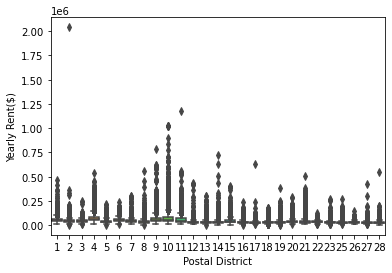

In [90]:
ax = sns.boxplot(x="Postal District", y="Yearly Rent($)", data=df)
ax

<AxesSubplot:>

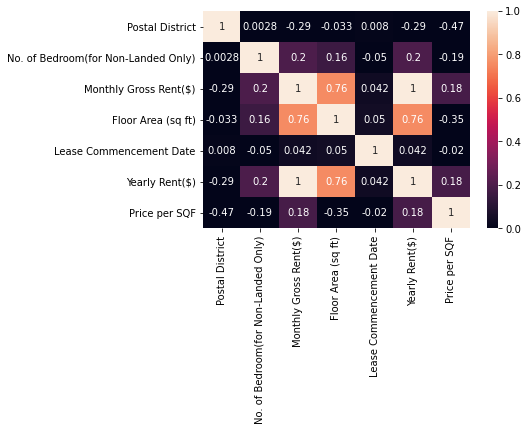

In [91]:
sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True)

## Reasons for keeping
Monthly Gross Rent improves with the more better rooms there are

Yearly Rent is also the same


In [92]:
df.head()

,Postal District,Type,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date,Yearly Rent($),Price per SQF
0,4,Non/landed Properties,1,2650,400,168,31800,79.500000
1,4,Non/landed Properties,3,7500,1900,168,90000,47.368421
2,3,Non/landed Properties,3,5000,1000,168,60000,60.000000
3,2,Non/landed Properties,2,5700,800,168,68400,85.500000
4,1,Non/landed Properties,4,4350,2200,168,52200,23.727273


In [93]:
# Find out mean, median, standard deviation, etc
df.describe()

,Postal District,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date,Yearly Rent($),Price per SQF
count,436938.000000,436938.000000,436938.000000,436938.000000,436938.000000,4.369380e+05,436938.000000
mean,13.352775,2.021195,3771.130803,1137.472136,1119.644629,4.525357e+04,43.432741
std,6.442947,1.149167,2507.166611,733.155202,527.925791,3.008600e+04,15.972483
min,1.000000,0.000000,307.000000,200.000000,168.000000,3.684000e+03,3.600000
25%,9.000000,1.000000,2400.000000,700.000000,537.000000,2.880000e+04,31.800000
50%,14.000000,2.000000,3000.000000,1000.000000,1257.000000,3.600000e+04,40.363636
75%,19.000000,3.000000,4200.000000,1300.000000,1624.000000,5.040000e+04,52.500000
max,28.000000,8.000000,170000.000000,8000.000000,1994.000000,2.040000e+06,680.000000


In [94]:
# Checks how many rows/columns are there
df.shape

(436938, 8)

## Hot-encoding type


In [95]:
df = pd.get_dummies(df, columns=['Type','Postal District'])
df.head()
#one hot encoding the types of housing

,No. of Bedroom(for Non-Landed Only),Monthly Gross Rent($),Floor Area (sq ft),Lease Commencement Date,Yearly Rent($),Price per SQF,Type_Detached House,Type_Executive Condominium,Type_Non/landed Properties,Type_Semi/Detached House,...,Postal District_18,Postal District_19,Postal District_20,Postal District_21,Postal District_22,Postal District_23,Postal District_25,Postal District_26,Postal District_27,Postal District_28
0,1,2650,400,168,31800,79.500000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,7500,1900,168,90000,47.368421,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,5000,1000,168,60000,60.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,5700,800,168,68400,85.500000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4350,2200,168,52200,23.727273,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df.keys()

Index(['No. of Bedroom(for Non-Landed Only)', 'Monthly Gross Rent($)',
       'Floor Area (sq ft)', 'Lease Commencement Date', 'Yearly Rent($)',
       'Price per SQF', 'Type_Detached House', 'Type_Executive Condominium',
       'Type_Non/landed Properties', 'Type_Semi/Detached House',
       'Type_Terrace House', 'Postal District_1', 'Postal District_2',
       'Postal District_3', 'Postal District_4', 'Postal District_5',
       'Postal District_6', 'Postal District_7', 'Postal District_8',
       'Postal District_9', 'Postal District_10', 'Postal District_11',
       'Postal District_12', 'Postal District_13', 'Postal District_14',
       'Postal District_15', 'Postal District_16', 'Postal District_17',
       'Postal District_18', 'Postal District_19', 'Postal District_20',
       'Postal District_21', 'Postal District_22', 'Postal District_23',
       'Postal District_25', 'Postal District_26', 'Postal District_27',
       'Postal District_28'],
      dtype='object')

In [97]:
df.shape

(436938, 38)

# Training Model - Regression
- We will test the training of model first.

In [98]:
X = df.drop(['Monthly Gross Rent($)'], axis=1)
Y = df['Monthly Gross Rent($)']

#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [107]:
reg = LinearRegression()
reg.fit(X_train,y_train)
test = reg.predict(X_test)
print(test)

[2700. 8500. 2200. ... 3800. 2700. 5500.]


In [108]:
y_predTest = reg.predict(X_test)
print(y_predTest)

[2700. 8500. 2200. ... 3800. 2700. 5500.]


In [113]:
# Predict results
y_predTrain = reg.predict(X_train)
y_predTest = reg.predict(X_test)
y_predValid = reg.predict(X_validation)

# MAE Computation
mae = mean_absolute_error(y_train, y_predTrain)
print("Mean Absolute Error on training data: {:.4f}".format(mae))

mae = mean_absolute_error(y_test, y_predTest)
print("Mean Absolute Error on test data: {:.4f}".format(mae))

mae = mean_absolute_error(y_validation, y_predValid)
print("Mean Absolute Error on validation data: {:.4f}\n".format(mae))

# MSE Computation
mse = mean_squared_error(y_train, y_predTrain)
print("Mean Squared Error on training data: {:.4f}".format(mse))

mse = mean_squared_error(y_test, y_predTest)
print("Mean Squared Error on test data: {:.4f}".format(mse))

mse = mean_absolute_error(y_validation, y_predValid)
print("Mean Squared Error on validation data: {:.4f}\n".format(mse))

# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_train, y_predTrain))
print("Root Mean Squared Error on training data: {:.4f}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test, y_predTest))
print("Root Mean Squared Error on test data: {:.4f}".format(rmse))

rmse = mean_absolute_error(y_validation, y_predValid)
print("Root Mean Squared Error on validation data: {:.4f}\n".format(rmse))

# R Square Computation
r2 = r2_score(y_train, y_predTrain)
print("R Square value on training data: {:.4f}".format(r2))

r2 = r2_score(y_test, y_predTest)
print("R Square value on test data: {:.4f}".format(r2))

r2 = r2_score(y_validation, y_predValid)
print("R Square value on validation data: {:.4f}\n".format(r2))

Mean Absolute Error on training data: 0.0000
Mean Absolute Error on test data: 0.0000
Mean Absolute Error on validation data: 0.0000

Mean Squared Error on training data: 0.0000
Mean Squared Error on test data: 0.0000
Mean Squared Error on validation data: 0.0000

Root Mean Squared Error on training data: 0.0000
Root Mean Squared Error on test data: 0.0000
Root Mean Squared Error on validation data: 0.0000

R Square value on training data: 1.0000
R Square value on test data: 1.0000
R Square value on validation data: 1.0000



In [110]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
predictions_rforest= random_forest.predict(X_test)
#print(mean_absolute_error(y_test,predictions_rforest))

In [112]:
# Predict results
y_predTrain = random_forest.predict(X_train)
y_predTest = random_forest.predict(X_test)
y_predValid = random_forest.predict(X_validation)

# MAE Computation
mae = mean_absolute_error(y_train, y_predTrain)
print("Mean Absolute Error on training data: {:.4f}".format(mae))

mae = mean_absolute_error(y_test, y_predTest)
print("Mean Absolute Error on test data: {:.4f}".format(mae))

mae = mean_absolute_error(y_validation, y_predValid)
print("Mean Absolute Error on validation data: {:.4f}\n".format(mae))

# MSE Computation
mse = mean_squared_error(y_train, y_predTrain)
print("Mean Squared Error on training data: {:.4f}".format(mse))

mse = mean_squared_error(y_test, y_predTest)
print("Mean Squared Error on test data: {:.4f}".format(mse))

mse = mean_absolute_error(y_validation, y_predValid)
print("Mean Squared Error on validation data: {:.4f}\n".format(mse))

# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_train, y_predTrain))
print("Root Mean Squared Error on training data: {:.4f}".format(rmse))

rmse = np.sqrt(mean_squared_error(y_test, y_predTest))
print("Root Mean Squared Error on test data: {:.4f}".format(rmse))

rmse = mean_absolute_error(y_validation, y_predValid)
print("Root Mean Squared Error on validation data: {:.4f}\n".format(rmse))

# R Square Computation
r2 = r2_score(y_train, y_predTrain)
print("R Square value on training data: {:.4f}".format(r2))

r2 = r2_score(y_test, y_predTest)
print("R Square value on test data: {:.4f}".format(r2))

r2 = r2_score(y_validation, y_predValid)
print("R Square value on validation data: {:.4f}\n".format(r2))


Mean Absolute Error on training data: 0.0547
Mean Absolute Error on test data: 2.2870
Mean Absolute Error on validation data: 0.7797

Mean Squared Error on training data: 43.1671
Mean Squared Error on test data: 198358.8741
Mean Squared Error on validation data: 0.7797

Root Mean Squared Error on training data: 6.5702
Root Mean Squared Error on test data: 445.3750
Root Mean Squared Error on validation data: 0.7797

R Square value on training data: 1.0000
R Square value on test data: 0.9714
R Square value on validation data: 0.9985



In [104]:
#helps to improve accuracy of the model by handling the decresing gradient
clf = ensemble.GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2, learning_rate=0.1, loss='ls')

In [105]:
clf.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [106]:
clf.score(X_test,y_test)

0.9761515278185313